<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/Multi_Variable_Linear_Regression_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np    #perform mathematical operation
import matplotlib.pyplot as plt   #for plot graphs 
import pandas as pd  #read csv & make data frame

In [2]:
from google.colab import drive  #import gogle drive data

In [3]:
drive.mount('/content/drive') # mount drive data into colab cloud and enter authentication code

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset Files"  

/content/drive/My Drive/Colab Notebooks/Dataset Files


In [5]:
coloumnName = ['area','bedroom','price']

In [6]:
dataset=pd.read_csv("ex1data2.txt",names=coloumnName)
print(dataset)
dataset.shape

    area  bedroom   price
0   2104        3  399900
1   1600        3  329900
2   2400        3  369000
3   1416        2  232000
4   3000        4  539900
5   1985        4  299900
6   1534        3  314900
7   1427        3  198999
8   1380        3  212000
9   1494        3  242500
10  1940        4  239999
11  2000        3  347000
12  1890        3  329999
13  4478        5  699900
14  1268        3  259900
15  2300        4  449900
16  1320        2  299900
17  1236        3  199900
18  2609        4  499998
19  3031        4  599000
20  1767        3  252900
21  1888        2  255000
22  1604        3  242900
23  1962        4  259900
24  3890        3  573900
25  1100        3  249900
26  1458        3  464500
27  2526        3  469000
28  2200        3  475000
29  2637        3  299900
30  1839        2  349900
31  1000        1  169900
32  2040        4  314900
33  3137        3  579900
34  1811        4  285900
35  1437        3  249900
36  1239        3  229900
37  2132    

(47, 3)

In [7]:
type(dataset)

pandas.core.frame.DataFrame

In [8]:
#dataf=pd.DataFrame(dataset)  #to check description of dataset
dataset.describe()

,area,bedroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [9]:
area_value = dataset.iloc[0:dataset.shape[0],0:1]
area_value

,area
0,2104
1,1600
2,2400
3,1416
4,3000
5,1985
6,1534
7,1427
8,1380
9,1494


In [10]:
bedroom_value = dataset.iloc[0:dataset.shape[0],1:2]
bedroom_value

,bedroom
0,3
1,3
2,3
3,2
4,4
5,4
6,3
7,3
8,3
9,3


In [11]:
price_value = dataset.iloc[0:dataset.shape[0],2:3]
price_value

,price
0,399900
1,329900
2,369000
3,232000
4,539900
5,299900
6,314900
7,198999
8,212000
9,242500


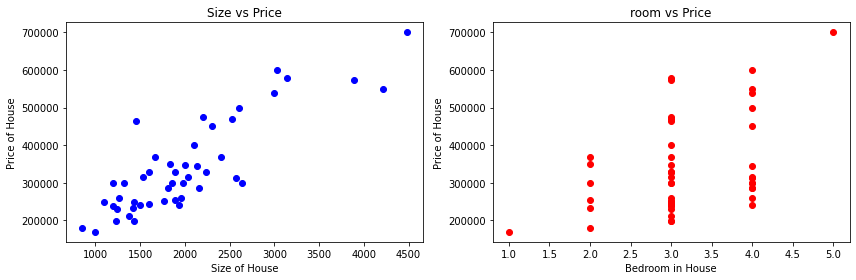

In [12]:
fig,axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(area_value,price_value,color='b')
axes[0].set_xlabel("Size of House")
axes[0].set_ylabel("Price of House")
axes[0].set_title("Size vs Price")

axes[1].scatter(bedroom_value,price_value,color='r')
axes[1].set_xlabel("Bedroom in House")
axes[1].set_ylabel("Price of House")
axes[1].set_title("room vs Price")

plt.tight_layout()

In [13]:
#feature Normalization
def feature_normalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std

    return X_norm,mean,std

In [14]:
type(dataset)

pandas.core.frame.DataFrame

In [15]:
data = dataset.values       # dataFrames to array
n = len(data[:,-1])
X=data[:,0:2].reshape(n,2)
X_norm,mean,std = feature_normalization(X)


In [16]:
mean

array([2000.68085106,    3.17021277])

In [17]:
X_norm

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [18]:
Y = data[:,-1].reshape(n,1)
Y

array([[399900],
       [329900],
       [369000],
       [232000],
       [539900],
       [299900],
       [314900],
       [198999],
       [212000],
       [242500],
       [239999],
       [347000],
       [329999],
       [699900],
       [259900],
       [449900],
       [299900],
       [199900],
       [499998],
       [599000],
       [252900],
       [255000],
       [242900],
       [259900],
       [573900],
       [249900],
       [464500],
       [469000],
       [475000],
       [299900],
       [349900],
       [169900],
       [314900],
       [579900],
       [285900],
       [249900],
       [229900],
       [345000],
       [549000],
       [287000],
       [368500],
       [329900],
       [314000],
       [299000],
       [179900],
       [299900],
       [239500]])

In [19]:
theta_array = np.zeros((3,1))
theta_array

array([[0.],
       [0.],
       [0.]])

In [20]:
#defining the Hypothesis    : H(x) = theta0 + theta1*x1 + theta2*x2

def hypothesis(theta_array,x1,x2):      #theta_array = [theta_array[0],theta_array[1],theta_array[2]]
    return theta_array[0]+(theta_array[1]*x1)+(theta_array[2]*x2)

In [21]:
def cost_function(theta_array,x1,x2,y,m):   #x and y are list of observation.
    total_error = 0     #accumulate all the error
    for i in range(m):
        total_error+=(theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i] - y[i])**2

    return total_error/(2*m)

In [26]:
def gradient_descent(theta_array,x1,x2,y,alpha,m):
    summation_theta0 = 0
    summation_theta1 = 0
    summation_theta2 = 0

    for i in range(m):
        summation_theta0+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])*x1[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])*x2[i])

    new_theta0 = theta_array[0]-alpha*(summation_theta0/m)
    new_theta1 = theta_array[1]-alpha*(summation_theta1/m)
    new_theta2 = theta_array[2]-alpha*(summation_theta2/m)

    updated_theta_array = [new_theta0,new_theta1,new_theta2]
    #print(updated_theta_array)
    return updated_theta_array

In [27]:
def training(x1,x2,y,alpha,iters):
    theta_0 = 0
    theta_1 = 0
    theta_2 = 0
    theta_array = [theta_0,theta_1,theta_2]

    m=x1.size                #size of the data set or the number of observation
    cost_function_values = []
    for i in range(iters):
        theta_array = gradient_descent(theta_array,x1,x2,y,alpha,m)     #taking the new theta's
        cost_function_values.append(cost_function(theta_array,x1,x2,y,m))   #taking all the cost function values and storing
        if(i%20==0):
            y_new=x2*theta_array[2]+x1*theta_array[1]+theta_array[0]       #linear regression line
            plt.plot(x1,y_new,'r')
            plt.scatter(x1,y)
            plt.show()

    x=np.arange(0,len(cost_function_values),step=1)
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("number of iteration")
    plt.ylabel("Cost/loss values")
    plt.title("cost Function curve")
    plt.show()

    return theta_array

In [ ]:
X_norm

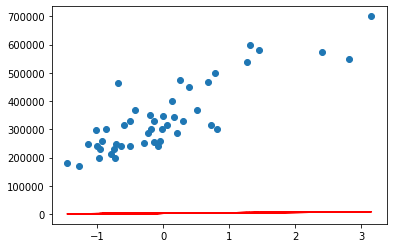

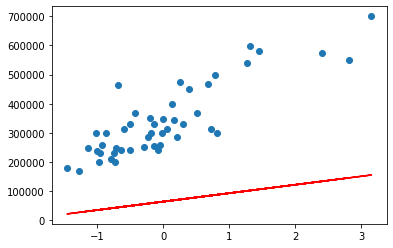

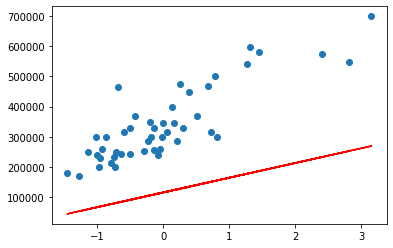

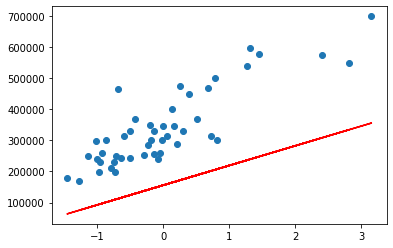

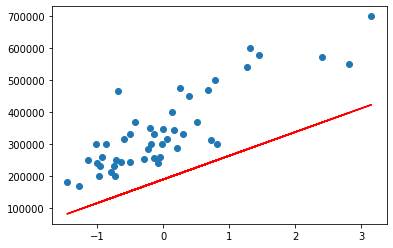

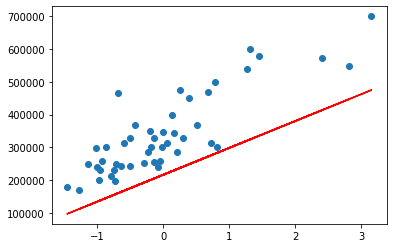

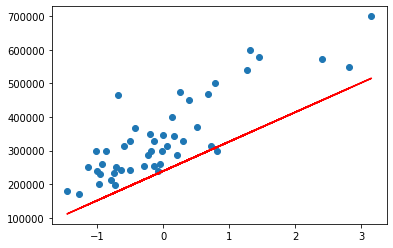

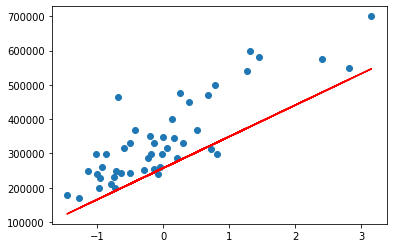

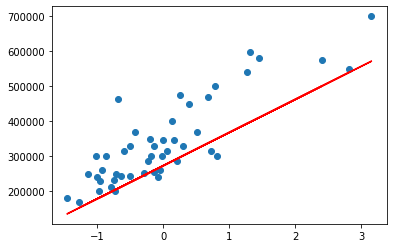

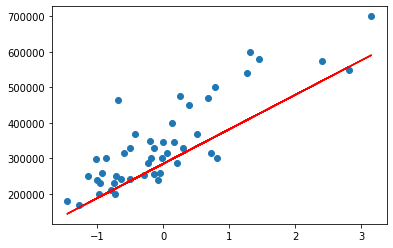

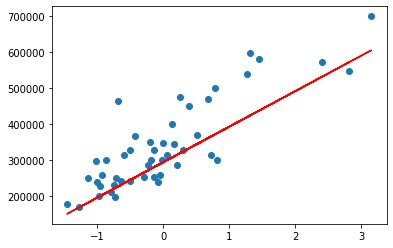

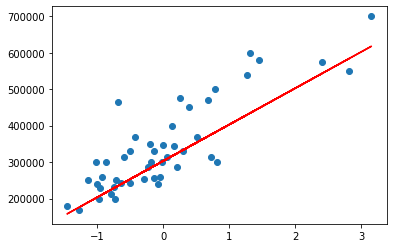

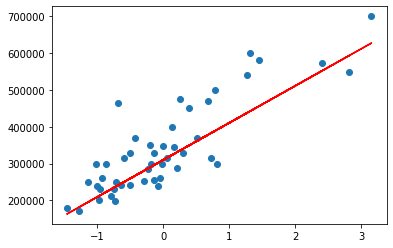

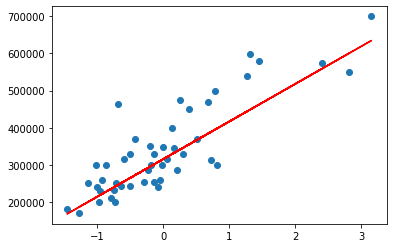

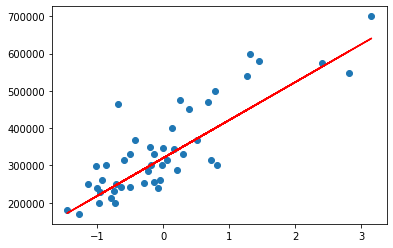

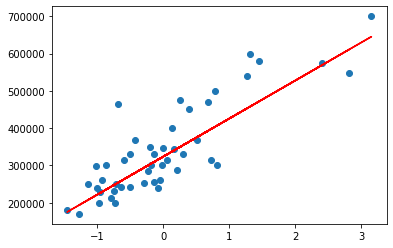

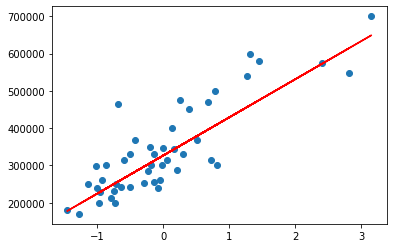

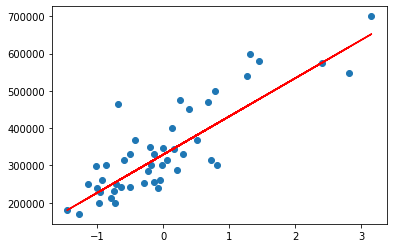

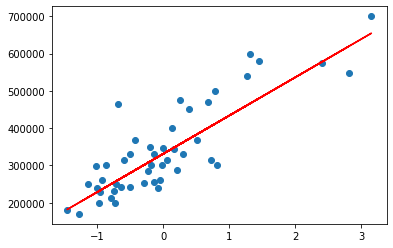

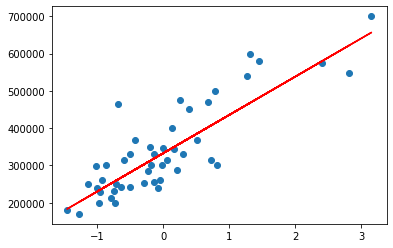

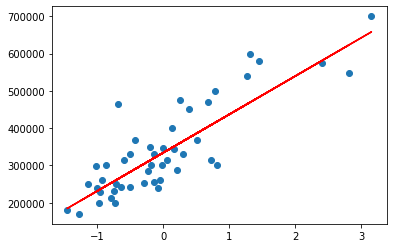

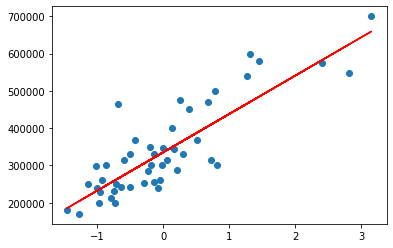

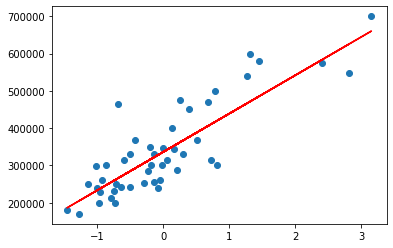

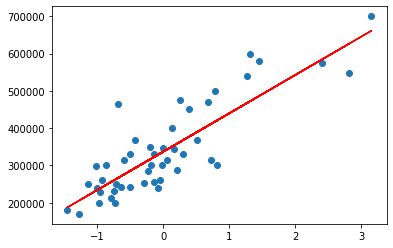

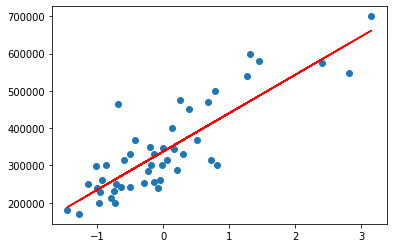

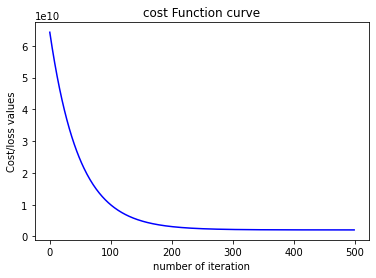

In [28]:
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],Y,0.01,500)